UNI: C004769137

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None
        self.num_classes = None
        self.data = {
            "train": None,
            "test" : None
        }
        # Removed self.create_model() to ensure the model is created after data preparation

    def prepare_data(self, images, labels):
        """
        Normalize the dataset, reshape images, perform one-hot encoding on labels,
        and split the data into training and validation sets.

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # Normalize pixel values to be between 0 and 1
        images = images.astype('float32') / 255.0

        # Reshape images to (num_examples, 28, 28, 1)
        images = images.reshape(-1, 28, 28, 1)

        # Determine the number of classes based on the highest label
        self.num_classes = np.max(labels) + 1  # Ensures all classes are accounted for

        # Convert labels to one-hot encoding
        labels = to_categorical(labels, self.num_classes)

        # Split into training and validation sets (90% train, 10% validation)
        x_train, x_val, y_train, y_val = train_test_split(
            images, labels, test_size=0.1, random_state=42, stratify=labels
        )

        # Save the prepared data
        self.data["train"] = (x_train, y_train)
        self.data["test"] = (x_val, y_val)

        # Create the model after data is prepared
        self.create_model()

    def create_model(self):
        """
        Create a Convolutional Neural Network (CNN) model and compile it.
        """
        model = Sequential()

        # First convolutional layer
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Second convolutional layer
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Flatten the output from the convolutional layers
        model.add(Flatten())

        # Fully connected (dense) layer
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))  # Dropout to prevent overfitting

        # Output layer with softmax activation for multi-class classification
        model.add(Dense(self.num_classes, activation='softmax'))

        # Compile the model with Adam optimizer and categorical crossentropy loss
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        self.model = model

    def train(self, batch_size=128, epochs=50, verbose=1):
        """
        Train the CNN model using the training data.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        :return history  Keras History object containing training metrics
        """
        if self.model is None:
            raise ValueError("Model has not been created. Call prepare_data() before training.")

        x_train, y_train = self.data["train"]
        x_val, y_val = self.data["test"]

        history = self.model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )

        return history

    def predict(self, data):
        """
        Predict labels for the given test data using the trained model.

        :param data: numpy array of test images
        :return predicted_labels: numpy array of predicted class labels
        """
        if self.model is None:
            raise ValueError("Model has not been created. Call prepare_data() and train() before prediction.")

        # Normalize pixel values
        data = data.astype('float32') / 255.0

        # Reshape images to (num_examples, 28, 28, 1)
        data = data.reshape(-1, 28, 28, 1)

        # Predict probabilities for each class
        predictions = self.model.predict(data)

        # Convert probabilities to class labels
        predicted_labels = np.argmax(predictions, axis=1)

        return predicted_labels

    def visualize_data(self, data):
        """
        Visualize a grid of hand gesture images from the dataset.

        :param data: Tuple containing (images, labels)
        """
        if data is None:
            print("No data to visualize.")
            return

        images, labels = data
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                idx = np.random.randint(0, images.shape[0])
                axs[i][j].imshow(images[idx].reshape(28, 28), cmap='gray')
                axs[i][j].axis('off')
                axs[i][j].set_title(f"Label: {np.argmax(labels[idx])}", fontsize=8)

        plt.show()

    def visualize_accuracy(self, history):
        """
        Plot the training and validation accuracy over epochs.

        :param history: Keras History object returned by model.fit()
        """
        if history is None:
            print("No history to visualize.")
            return

        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title("Model Accuracy Over Epochs")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


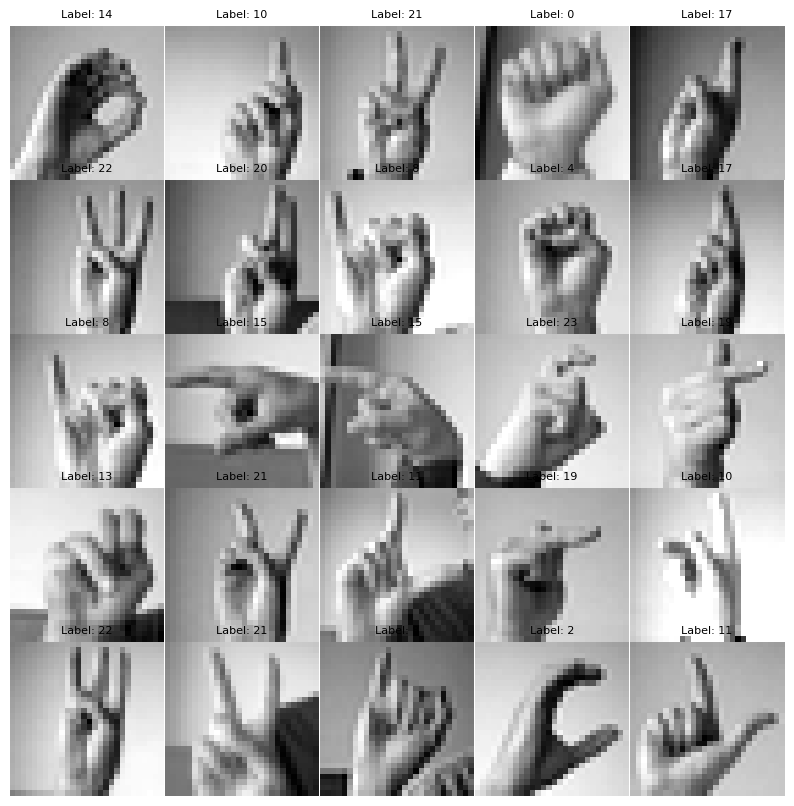

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1524 - loss: 2.8471 - val_accuracy: 0.7855 - val_loss: 0.9492
Epoch 2/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6498 - loss: 1.0833 - val_accuracy: 0.9199 - val_loss: 0.3438
Epoch 3/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8075 - loss: 0.5905 - val_accuracy: 0.9592 - val_loss: 0.1763
Epoch 4/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8693 - loss: 0.3860 - val_accuracy: 0.9898 - val_loss: 0.0776
Epoch 5/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9025 - loss: 0.2867 - val_accuracy: 0.9964 - val_loss: 0.0399
Epoch 6/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9355 - loss: 0.1990 - val_accuracy: 0.9975 - val_loss: 0.0250
Epoch 7/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9540 - loss: 0.1458 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 8/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9587 - loss: 0.1234 - val_accuracy: 0

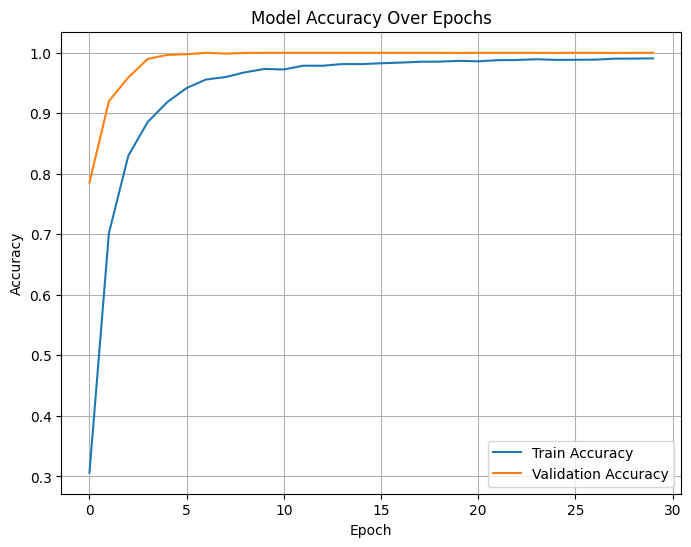

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.9365588399330731
